In [2]:
from data import *

import pandas as pd
from collections import defaultdict
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.font_manager

try:
    matplotlib.font_manager.fontManager.addfont('/usr/share/fonts/truetype/tlwg/Sawasdee.ttf')
    
    matplotlib.rcParams.update(
        {
            'text.usetex': False,
            'font.family': ['Sawasdee'],
        }
    )
except Exception as e:
    print(e)
    pass

# EXCLUDE_PARTY_NO = []
EXCLUDE_PARTY_NO = [7, 11, 14, 18, 22, 25, 26, 29, 31, 32, 37]

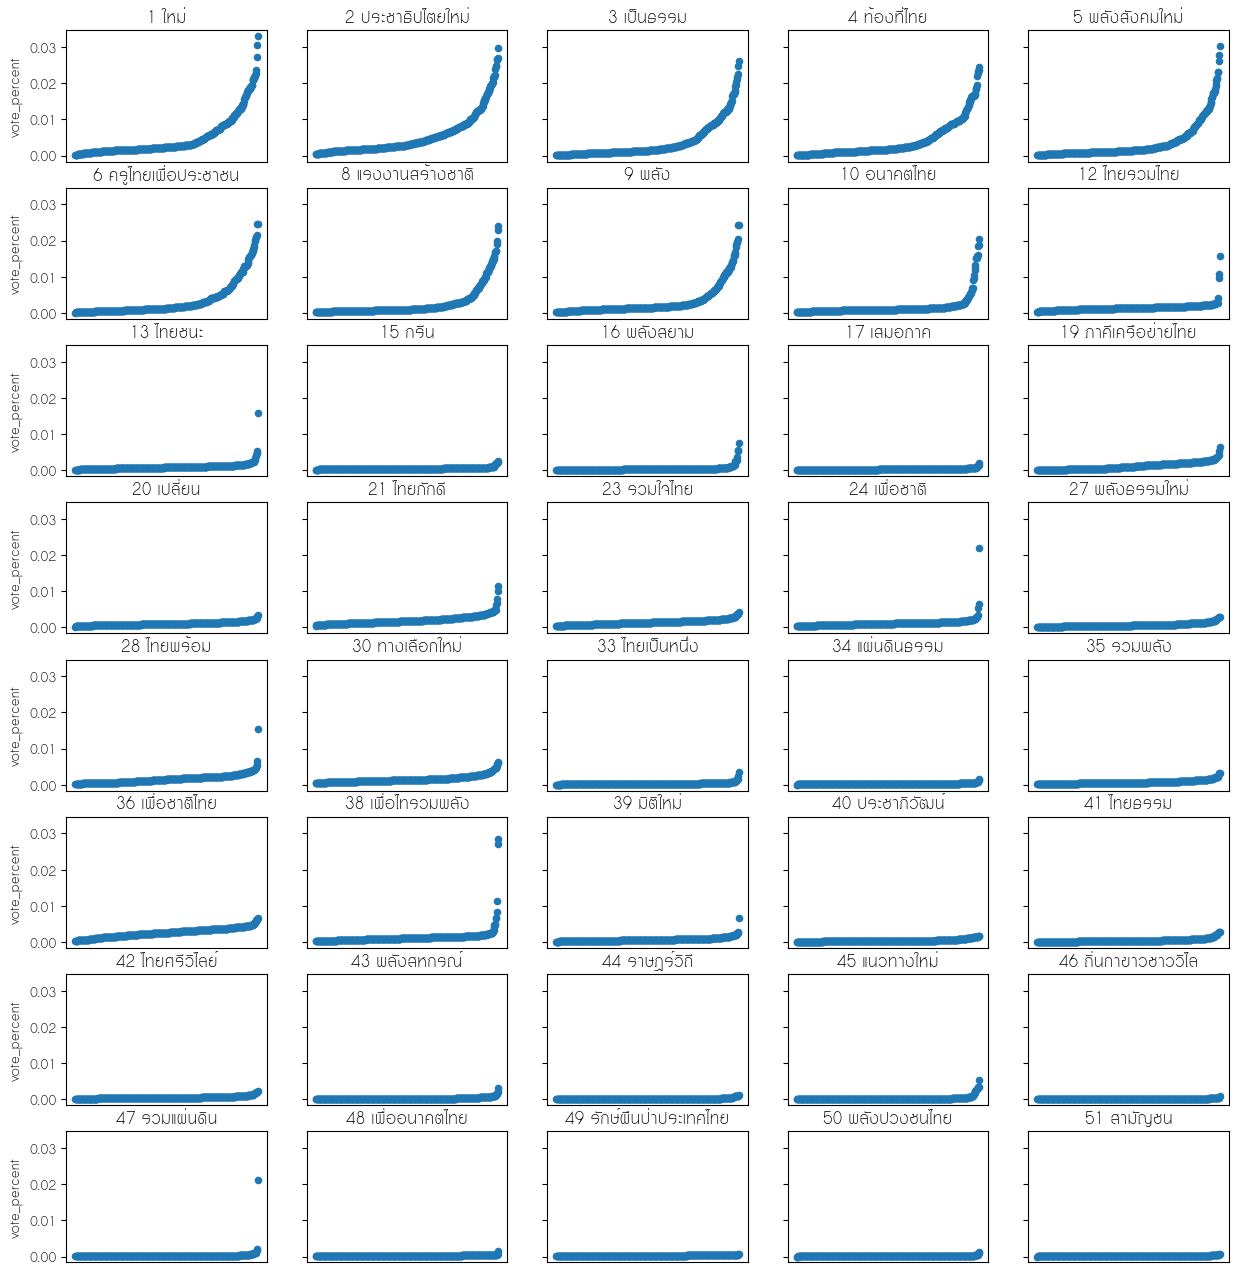

In [3]:
# sorted
filtered_parties = Parties[
    (Parties['party_no'] != '') & (~Parties['party_no'].isin(EXCLUDE_PARTY_NO))
].sort_values('party_no')
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharey=True)
for i, party_id in enumerate(filtered_parties.index[:40]):
    df = PartyListResult[PartyListResult['party_id'] == party_id].join(
        Constituencies, on='cons_id'
    )
    df['vote_percent'] = df['party_list_vote'] / df['registered_vote']
    df.reset_index().sort_values(
        'vote_percent'
    ).plot(
        x='cons_id', y='vote_percent', kind='scatter', 
        title=f'{Parties["party_no"][party_id]} {Parties["name"][party_id]}',
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

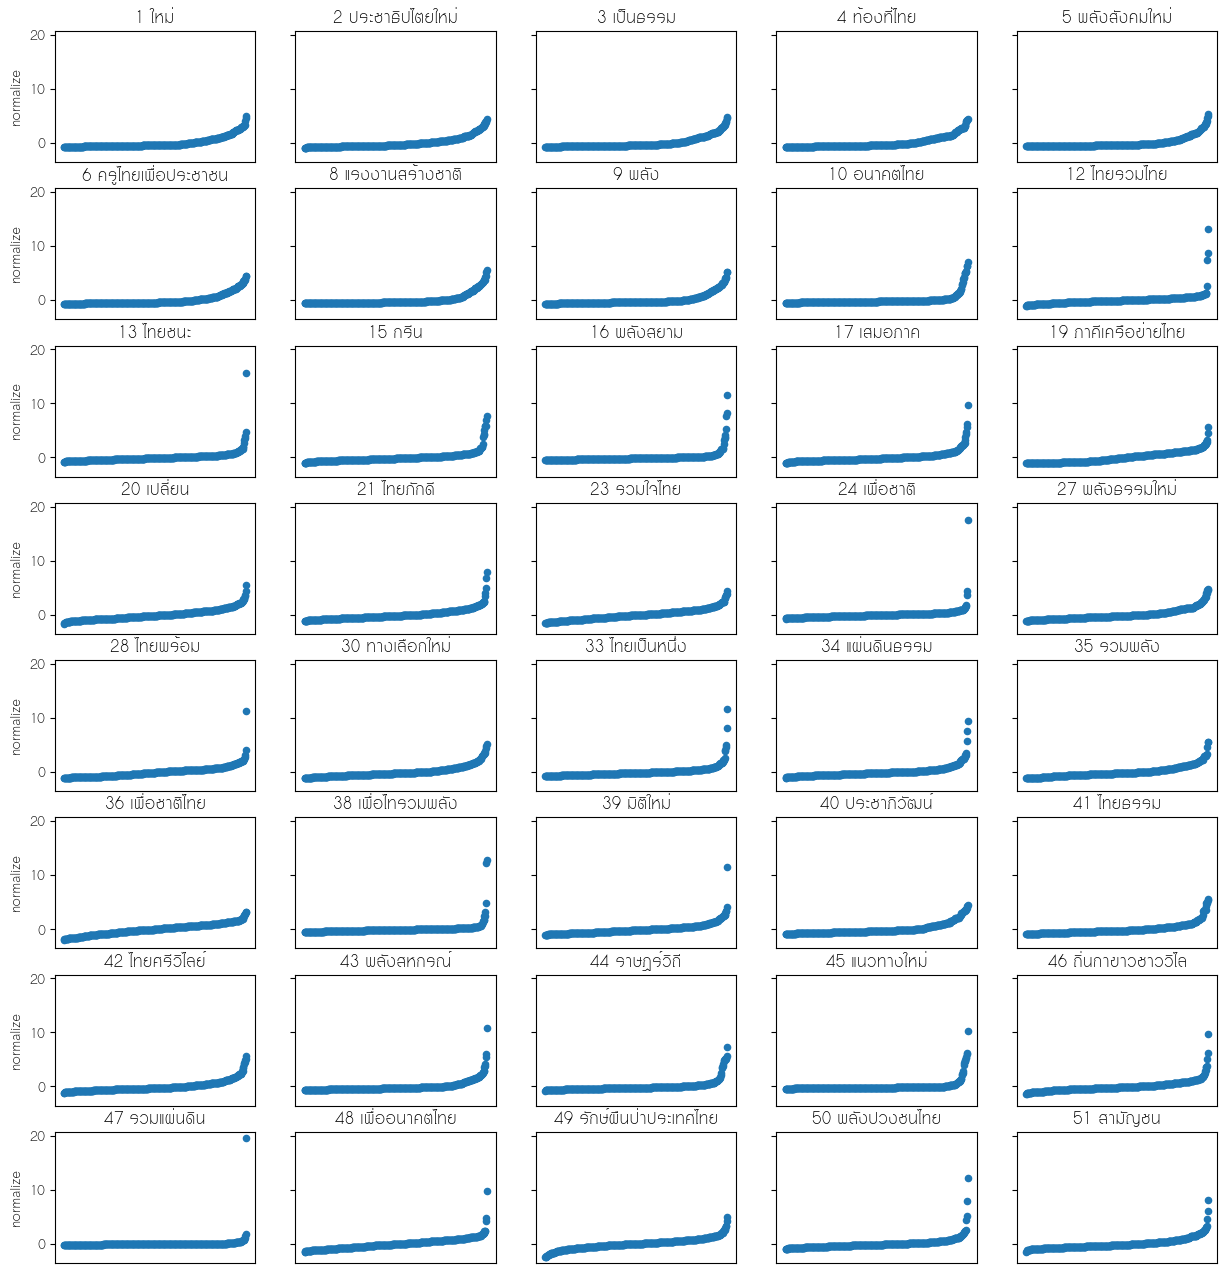

In [4]:
# Normalize sorted

filtered_parties = Parties[
    (Parties['party_no'] != '') & (~Parties['party_no'].isin(EXCLUDE_PARTY_NO))
].sort_values('party_no')
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharey=True)
for i, party_id in enumerate(filtered_parties.index[:40]):
    df = PartyListResult[PartyListResult['party_id'] == party_id].join(
        Constituencies, on='cons_id'
    )
    df['vote_percent'] = df['party_list_vote'] / df['registered_vote']
    df['normalize'] = (df['vote_percent']-df['vote_percent'].mean()) / df['vote_percent'].std()
    df.reset_index().sort_values(
        'vote_percent'
    ).plot(
        x='cons_id', y='normalize', kind='scatter', 
        title=f'{Parties["party_no"][party_id]} {Parties["name"][party_id]}',
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

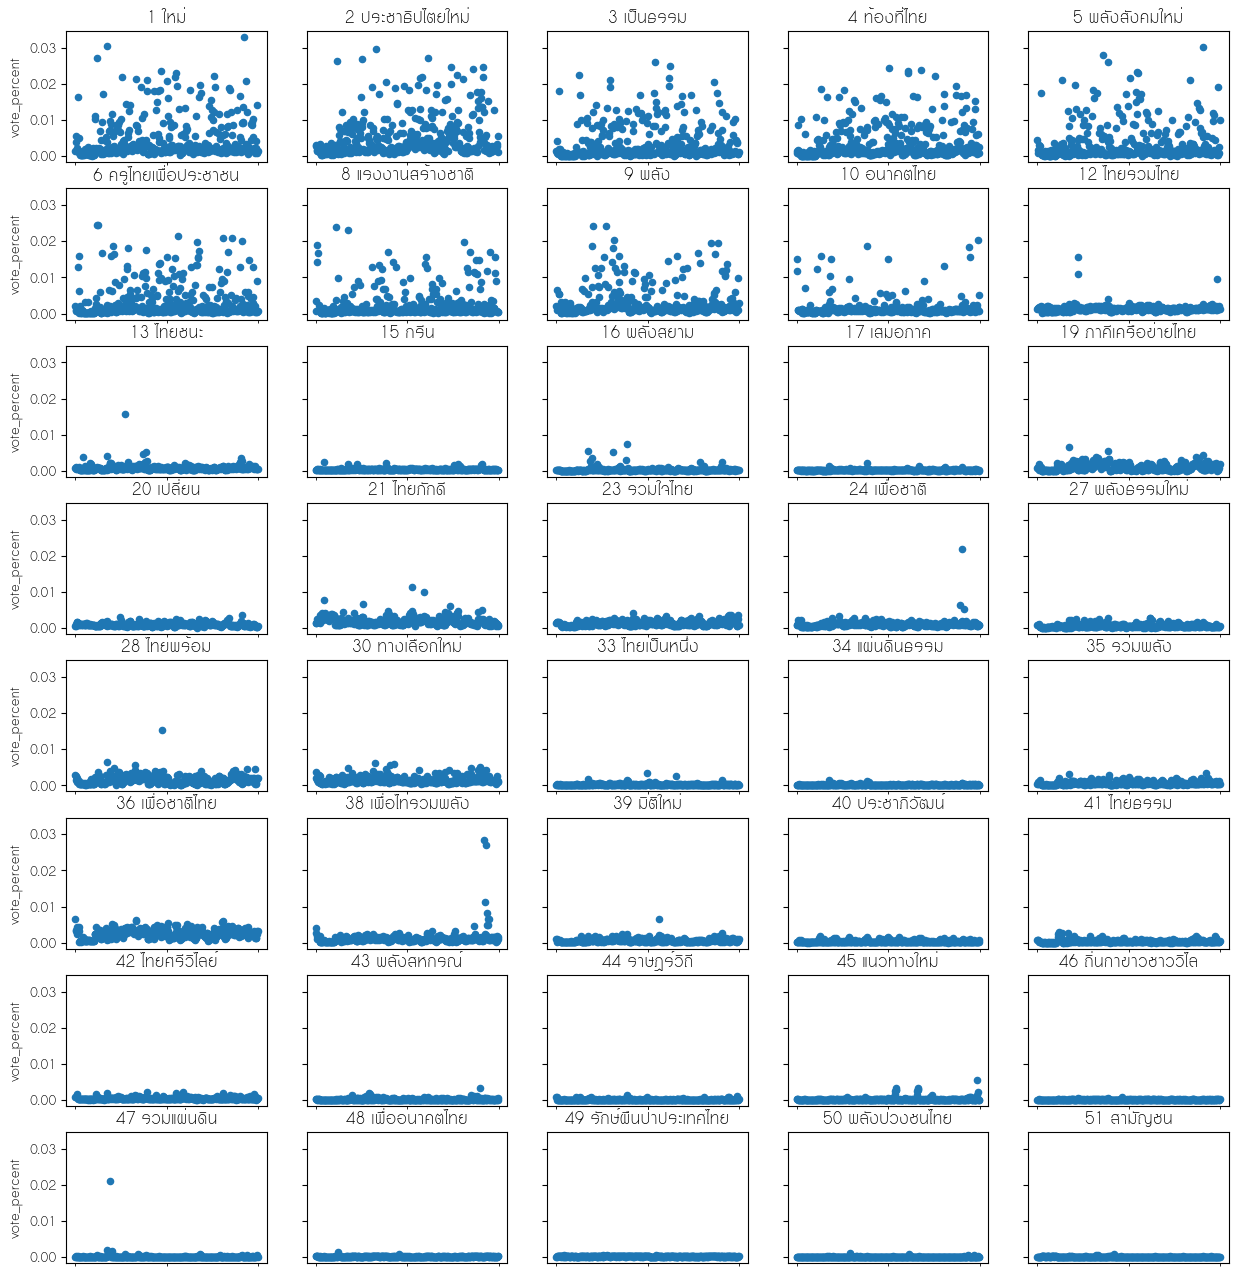

In [5]:
# unsort
filtered_parties = Parties[
    (Parties['party_no'] != '') & (~Parties['party_no'].isin(EXCLUDE_PARTY_NO))
].sort_values('party_no')
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharey=True, sharex=True)
for i, party_id in enumerate(filtered_parties.index[:40]):
    df = PartyListResult[PartyListResult['party_id'] == party_id].join(
        Constituencies, on='cons_id'
    )
    df['vote_percent'] = df['party_list_vote'] / df['registered_vote']
    df.reset_index().plot(
        x='cons_id', y='vote_percent', kind='scatter', 
        title=f'{Parties["party_no"][party_id]} {Parties["name"][party_id]}',
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

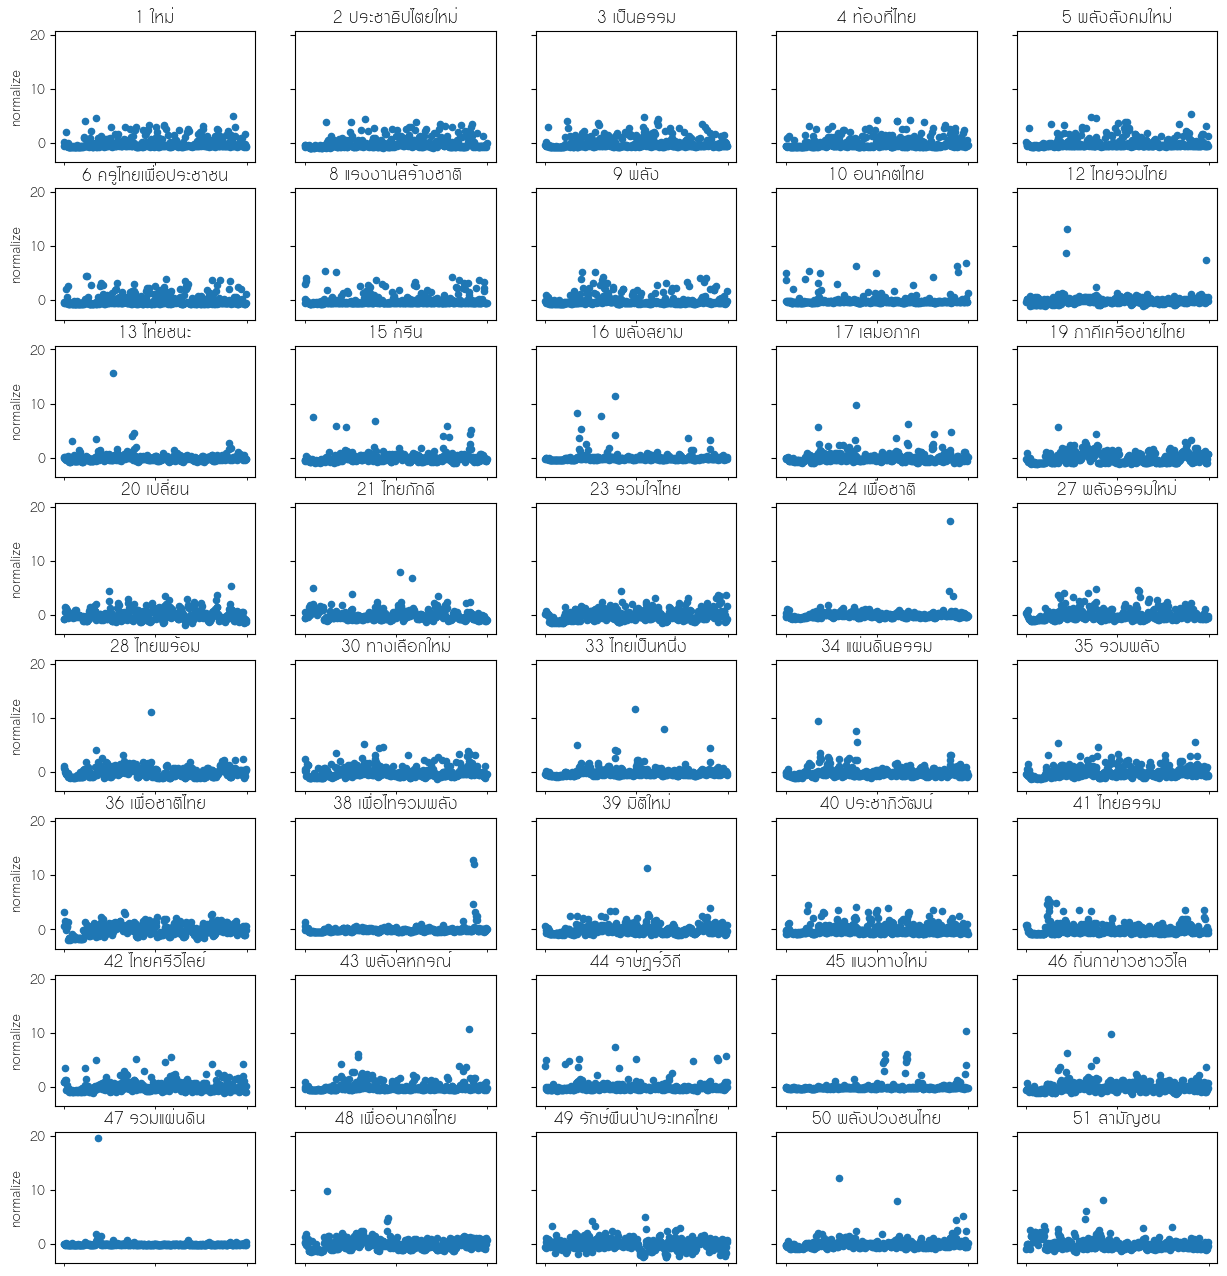

In [6]:
# Normalize unsort
filtered_parties = Parties[
    (Parties['party_no'] != '') & (~Parties['party_no'].isin(EXCLUDE_PARTY_NO))
].sort_values('party_no')
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharey=True, sharex=True)
for i, party_id in enumerate(filtered_parties.index[:40]):
    df = PartyListResult[PartyListResult['party_id'] == party_id].join(
        Constituencies, on='cons_id'
    )
    df['vote_percent'] = df['party_list_vote'] / df['registered_vote']
    df['normalize'] = (df['vote_percent']-df['vote_percent'].mean()) / df['vote_percent'].std()
    df.reset_index().plot(
        x='cons_id', y='normalize', kind='scatter', 
        title=f'{Parties["party_no"][party_id]} {Parties["name"][party_id]}',
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

In [7]:
df = PartyListResult.join(
    Constituencies, on='cons_id'
)
df['vote_percent'] = df['party_list_vote'] / df['registered_vote']
df = df[['party_id', 'vote_percent']].groupby(
    'party_id'
).apply(
    lambda d: pd.DataFrame({
        'perc_75': d['vote_percent'].describe()['75%'],
        'mean_75': d[d['vote_percent'] <= d['vote_percent'].describe()['75%']]['vote_percent'].mean(),
        'mean': d['vote_percent'].mean(),
        'std': d['vote_percent'].std(),
    }, index=[d['party_id'].iloc[0]])
)
df = df.join(Parties, how='left')

<Axes: xlabel='party_no'>

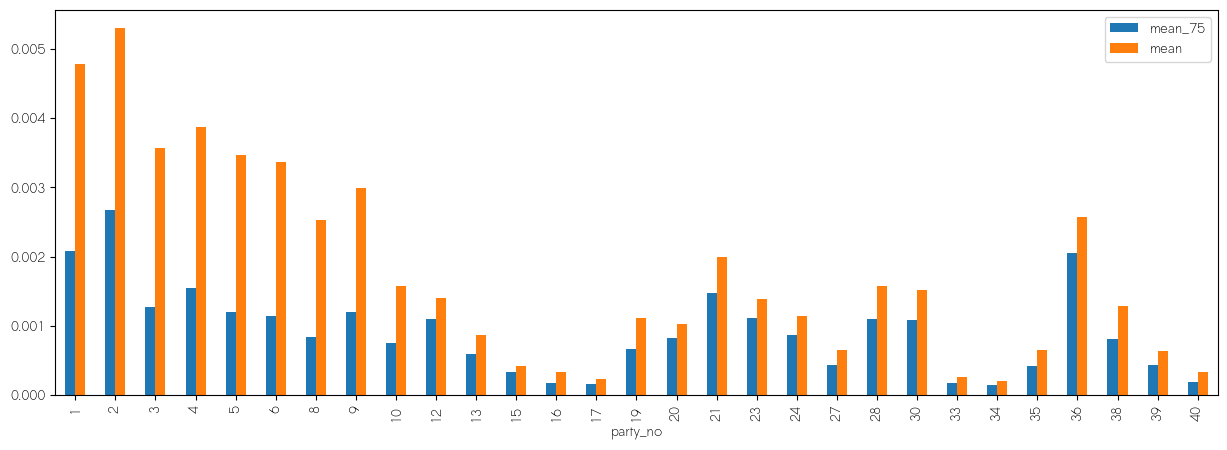

In [8]:
df = df[(df['party_no'] != '') & (~df['party_no'].isin(EXCLUDE_PARTY_NO))]
df[df['party_no'] <= 40][['party_no', 'mean_75', 'mean']].sort_values(
    'party_no'
).plot(x='party_no', kind='bar', figsize=(15, 5))

In [9]:
df[df['mean']/df['mean_75'] >= 1.75][['party_no', 'name']].sort_values('party_no')

,,party_no,name
party_id,,,
778,778,1,ใหม่
712,712,2,ประชาธิปไตยใหม่
747,747,3,เป็นธรรม
776,776,4,ท้องที่ไทย
761,761,5,พลังสังคมใหม่
714,714,6,ครูไทยเพื่อประชาชน
779,779,8,แรงงานสร้างชาติ
781,781,9,พลัง
708,708,10,อนาคตไทย


---

In [10]:
suspected_constituencies = defaultdict(lambda: {
    'count': 0,
    'parties': {}
})
threshold = 1.5

parties_no = [1, 2, 3, 4, 5, 6, 8, 9, 10]
pl_result = PartyListResult.join(
    Parties, on='party_id'
).join(
    Constituencies, on='cons_id'
)[['cons_id', 'party_no', 'registered_vote', 'party_list_vote']]
for party_no in parties_no:
    df = pl_result[pl_result['party_no'] == party_no].copy()
    df['vote_percent'] = df['party_list_vote'] / df['registered_vote']
    df['normalize'] = (df['vote_percent']-df['vote_percent'].mean()) / df['vote_percent'].std()
    df['sdx'] = df['normalize'] >= threshold
    perc_75 = df['vote_percent'].describe()['75%']
    mean = df[df['vote_percent'] <= perc_75]['vote_percent'].mean()
    for cons_id in set(df[df['sdx']]['cons_id']):
        suspected_constituencies[cons_id]['count'] += 1
        suspected_constituencies[cons_id]['parties'][party_no] = {
            'mean': mean,
            'sd': df['vote_percent'].std(),
            'vote': df[df['cons_id'] == cons_id]['vote_percent'].values[0]
        }
    print('{} {} {}'.format(
        Parties[Parties['party_no'] == party_no]['name'].iloc[0], 
        mean, 
        df['vote_percent'].std()
    ))
    
ordered_suspected_constituencies = sorted(
    [(con, d['count']) for con, d in suspected_constituencies.items()], 
    key=lambda x: x[0]
)
print(len(ordered_suspected_constituencies))

ใหม่ 0.0020838919983317663 0.005584284817969388
ประชาธิปไตยใหม่ 0.002681487179393162 0.005528392766996341
เป็นธรรม 0.001273166168104354 0.0047430682179403745
ท้องที่ไทย 0.0015526371279450182 0.004744068224574547
พลังสังคมใหม่ 0.0011984616296848076 0.0049800045394402526
ครูไทยเพื่อประชาชน 0.0011464791267341338 0.004715263199530886
แรงงานสร้างชาติ 0.0008373715845832913 0.003932198326587807
พลัง 0.0012063836733956727 0.004057603167837081
อนาคตไทย 0.0007499024110277746 0.0026936143937286725
235


In [11]:
cheating_parties = defaultdict(lambda: 0)

results = ConstituencyResult.join(
    Constituencies, on='cons_id'
).join(
    ConstituencyCandidates[['mp_app_no', 'mp_app_name']], on='mp_app_id'
).join(
    Parties[['party_no', 'name']], on='party_id'
).join(
    Provinces[['province']], on='prov_id'
)

results

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,party_id,cons_no,prov_id,registered_vote,total_vote_stations,zone,mp_app_no,mp_app_name,party_no,name,province
id,,,,,,,,,,,,,,,
0,ACR_1,ACR_1_1,9,459,706,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญอำเภอหัวตะพาน,1,นางสาวปิยะมาศ บัวแก้ว,14,ชาติพัฒนากล้า,อำนาจเจริญ
1,ACR_1,ACR_1_10,1,38275,709,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญอำเภอหัวตะพาน,10,นางสุขสมรวย วันทนียกุล,7,ภูมิใจไทย,อำนาจเจริญ
2,ACR_1,ACR_1_11,12,127,712,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญอำเภอหัวตะพาน,11,นายการันต์ ลุนพันธ์,2,ประชาธิปไตยใหม่,อำนาจเจริญ
3,ACR_1,ACR_1_12,13,126,742,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญอำเภอหัวตะพาน,12,นายไสว ผลาวงศ์,61,คลองไทย,อำนาจเจริญ
4,ACR_1,ACR_1_13,11,212,761,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญอำเภอหัวตะพาน,13,นายสงบ โสภิพันธ์,5,พลังสังคมใหม่,อำนาจเจริญ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776,YST_3,YST_3_5,1,37946,709,3,YST,146060,303,"อำเภอเลิงนกทาอำเภอไทยเจริญ (ยกเว้นตำบลน้ำคำ, ต...",5,นายธนพัฒน์ ศรีชนะ,7,ภูมิใจไทย,ยโสธร
4777,YST_3,YST_3_6,7,821,763,3,YST,146060,303,"อำเภอเลิงนกทาอำเภอไทยเจริญ (ยกเว้นตำบลน้ำคำ, ต...",6,นายพิทยา พาลุสุข,22,รวมไทยสร้างชาติ,ยโสธร
4778,YST_3,YST_3_7,9,531,712,3,YST,146060,303,"อำเภอเลิงนกทาอำเภอไทยเจริญ (ยกเว้นตำบลน้ำคำ, ต...",7,นายศรายุทธ สุดสวาท,2,ประชาธิปไตยใหม่,ยโสธร


In [23]:
cheating_parties = defaultdict(lambda: 0)

results = ConstituencyResult.join(
    Constituencies, on='cons_id'
).join(
    ConstituencyCandidates[['mp_app_no', 'mp_app_name']], on='mp_app_id'
).join(
    Parties[['party_no', 'name']], on='party_id'
).join(
    Provinces[['province']], on='prov_id'
)

with open('/tmp/out.txt', 'w') as f:
    for cons_id, _ in ordered_suspected_constituencies:
        df = results[results['cons_id'] == cons_id].sort_values('mp_app_rank')
        f.write('{} {} {}\n'.format(cons_id, df.iloc[0]['province'], df.iloc[0]['zone']))
        party_1_10 = set()
        for party_no, d in suspected_constituencies[cons_id]['parties'].items():
            party_1_10.add(party_no)
            registered_vote = df.iloc[0]['registered_vote']
            f.write('{} {} {}/{}\n'.format(
                party_no, Parties[Parties['party_no'] == party_no].iloc[0]['name'],
                round(registered_vote * (d['vote']-d['mean'])),
                round(registered_vote * d['vote']), 
            ))
        f.write('---\n')
        mp_app_no = df.iloc[0]['mp_app_no']
        if mp_app_no in party_1_10:
            cheating_parties[df.iloc[0]['party_no']] += 1
        for row in df.iloc[0:4].iterrows():
            r = row[1]
            f.write('{} {} {} {}\n'.format(
                r['mp_app_no'], r['name'], r['mp_app_name'], r['mp_app_vote']
            ))
        f.write('======\n\n')

In [24]:
pprint(dict(cheating_parties))

{7: 59, 11: 4, 14: 1, 18: 8, 22: 11, 26: 13, 29: 58, 32: 4, 37: 31, 38: 2}


In [34]:
cheating_df = pd.DataFrame([
    {
        'party': f"[{party_no}] {Parties[Parties['party_no'] == party_no].iloc[0]['name']}", 'count': count
    } for (party_no, count) in cheating_parties.items()
])
cheating_df.sort_values('count', ascending=False)

,party,count
0,[7] ภูมิใจไทย,59
2,[29] เพื่อไทย,58
3,[37] พลังประชารัฐ,31
4,[26] ประชาธิปัตย์,13
1,[22] รวมไทยสร้างชาติ,11
5,[18] ชาติไทยพัฒนา,8
7,[11] ประชาชาติ,4
9,[32] ไทยสร้างไทย,4
8,[38] เพื่อไทรวมพลัง,2
6,[14] ชาติพัฒนากล้า,1


<Axes: xlabel='party'>

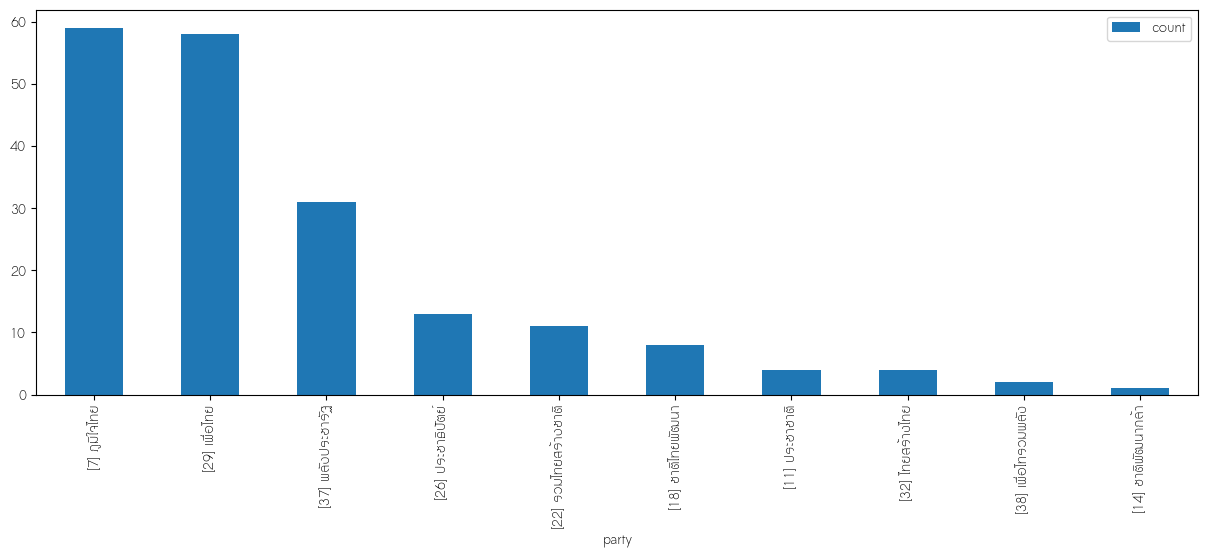

In [35]:
cheating_df.sort_values('count', ascending=False).plot(x='party', figsize=(15, 5), kind='bar')